A sort-of implementation of ggridges ([https://cran.r-project.org/web/packages/ggridges/vignettes/introduction.html](https://cran.r-project.org/web/packages/ggridges/vignettes/introduction.html)) from R, except that I don't think there's any reason to use kernel density estimates for these plots unless you have to.

Basic premise is that we plot multiple histograms in their own subplot axes, and then use `hspace` to overlap the plotting axes vertically

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import norm

In [43]:
_new_black = '#373737'
sns.set_theme(style='ticks', font_scale=0.75, rc={
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans'],
    'svg.fonttype': 'none',
    'text.usetex': False,
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.size': 9,
    'axes.labelsize': 9,
    'axes.titlesize': 9,
    'axes.labelpad': 2,
    'axes.linewidth': 0.5,
    'axes.titlepad': 4,
    'lines.linewidth': 0.5,
    'legend.fontsize': 9,
    'legend.title_fontsize': 9,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'xtick.major.size': 2,
    'xtick.major.pad': 2,
    'xtick.major.width': 0.5,
    'ytick.major.size': 2,
    'ytick.major.pad': 2,
    'ytick.major.width': 0.5,
    'xtick.minor.size': 2,
    'xtick.minor.pad': 2,
    'xtick.minor.width': 0.5,
    'ytick.minor.size': 2,
    'ytick.minor.pad': 2,
    'ytick.minor.width': 0.5,

    # Avoid black unless necessary
    'text.color': _new_black,
    'patch.edgecolor': _new_black,
    'patch.force_edgecolor': False, # Seaborn turns on edgecolors for histograms by default and I don't like it
    'hatch.color': _new_black,
    'axes.edgecolor': _new_black,
    # 'axes.titlecolor': _new_black # should fallback to text.color
    'axes.labelcolor': _new_black,
    'xtick.color': _new_black,
    'ytick.color': _new_black

    # Default colormap - personal preference
    # 'image.cmap': 'inferno'
})

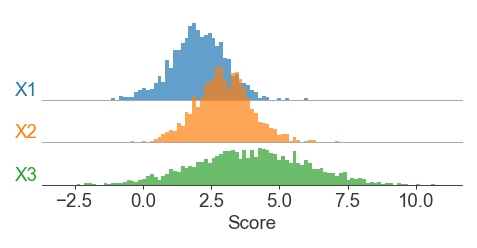

In [44]:

# Different vector sizes are OK - we're normalizing histograms by density
x1 = norm.rvs(loc=2, scale=1, size=1000, random_state=1)
x2 = norm.rvs(loc=3, scale=1, size=1500, random_state=2)
x3 = norm.rvs(loc=4, scale=2, size=2000, random_state=3)

# Same bins across all distributions for valid comparisons
bins = np.linspace(-3, 11, 100)

x = {
    'X1': x1,
    'X2': x2,
    'X3': x3
}

colors = mpl.cm.tab10.colors

fig = plt.figure(figsize=(4, 1.5), dpi=150)
gs = fig.add_gridspec(3, 1, hspace=-0.5, left=0.2)

for i, (label, vals) in enumerate(x.items()):
    ax = fig.add_subplot(gs[i, 0])

    ax.hist(vals, bins=bins, density=True,
        color=colors[i], edgecolor='none', alpha=0.7)
    ax.set_ylim([0, 0.5]) # Fixed ylimit for density comparisons

    # Transparent background
    ax.patch.set_alpha(0)

    # Turn off all spines except the bottom one
    for spine in ax.spines.keys():
        ax.spines[spine].set_visible(False)
        
    ax.spines['bottom'].set_visible(True)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('#AAA')

    # Only show x ticks and label for bottom plot
    if i == len(x) - 1:
        ax.spines['bottom'].set_color('#444')
        ax.set_xlabel('Score')
    else:
        ax.set_xticks([])
        ax.set_xticklabels([])
    
    ax.set_yticks([])

    # Label
    ax.text(-0.01, 0, label, color=colors[i],
        transform=ax.transAxes, ha='right', va='bottom')
    
plt.show()

Here's a similar version, but with additional graphics to display missing data (NaNs) while still appropriately scaling the histograms

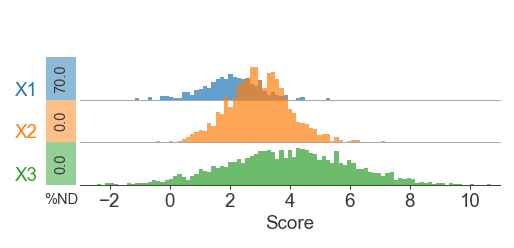

In [58]:

# Different vector sizes are OK - we're normalizing histograms by density
x1 = norm.rvs(loc=2, scale=1, size=1000, random_state=1)
x2 = norm.rvs(loc=3, scale=1, size=1500, random_state=2)
x3 = norm.rvs(loc=4, scale=2, size=2000, random_state=3)

# Knockout half of the points
x1[:700] = np.nan

# Same bins across all distributions for valid comparisons
bins = np.linspace(-3, 11, 100)

x = {
    'X1': x1,
    'X2': x2,
    'X3': x3
}

colors = mpl.cm.tab10.colors

fig = plt.figure(figsize=(4, 1.5), dpi=150)
gs = fig.add_gridspec(3, 1, hspace=-0.5, left=0.2)

for i, (label, vals) in enumerate(x.items()):
    ax = fig.add_subplot(gs[i, 0])

    # Set NaNs to some really low value and extend the bin range to count it,
    # but use xlim to only keep our plot within the original bin range
    nan_placeholder_val = -10
    n_missing = np.sum(np.isnan(vals))
    vals[np.isnan(vals)] = nan_placeholder_val
    xlim = [bins[0], bins[-1]]
    new_bins = np.append(2 * nan_placeholder_val, bins)

    ax.hist(vals, bins=new_bins, density=True,
        color=colors[i], edgecolor='none', alpha=0.7)
    ax.set_xlim(xlim)
    ax.set_ylim([0, 0.5])
    
    # Transparent background
    ax.patch.set_alpha(0)

    # Turn off all spines except the bottom one
    for spine in ax.spines.keys():
        ax.spines[spine].set_visible(False)
        
    ax.spines['bottom'].set_visible(True)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('#AAA')

    # Only show x ticks and label for bottom plot
    if i == len(x) - 1:
        ax.spines['bottom'].set_color('#444')
        ax.set_xlabel('Score')
    else:
        ax.set_xticks([])
        ax.set_xticklabels([])
    
    ax.set_yticks([])
        
    # % Not detected
    rect_width = 0.07
    rect_height = 0.5
    rect_padding = 0.01 # Padding from the axis
    ax.add_patch(mpl.patches.Rectangle(
        ((-1 * rect_width) - rect_padding, 0), rect_width, rect_height,
        transform=ax.transAxes, clip_on=False, facecolor=colors[i], alpha=0.5
    ))
    ax.text((-1 * (rect_width / 2))-rect_padding, 0.25, 
        '{:.1f}'.format((n_missing / len(vals)) * 100), 
        fontsize=7, transform=ax.transAxes, rotation=90, ha='center', va='center')
    if i == len(x) - 1:
        ax.text((-1 * (rect_width / 2))-rect_padding, -0.1, 
        '%ND', transform=ax.transAxes, ha='center', va='top', fontsize=7)

    # Label
    ax.text((-1 * rect_width) - rect_padding - 0.02, 0, label, color=colors[i],
        transform=ax.transAxes, ha='right', va='bottom')
    
plt.show()